In [1]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

In [2]:
def sir_vaccine_model(y, t, beta, gamma, nu):
    S, I, R = y
    N = S + I + R
    dS = -beta * S * I / N - nu * S
    dI = beta * S * I / N - gamma * I
    dR = gamma * I + nu * S
    return [dS, dI, dR]

In [3]:
S0 = 990  # Susceptible individuals
I0 = 10   # Infected individuals
R0 = 0    # Recovered individuals
initial_conditions = [S0, I0, R0]
beta = 0.3   # Infection rate
gamma = 0.1  # Recovery rate
nu = 0.05    # Vaccination rate

In [5]:
# Time points
t = np.linspace(0, 160, 160)

In [6]:
solution = odeint(sir_vaccine_model, initial_conditions, t, args=(beta, gamma, nu))
S, I, R = solution.T

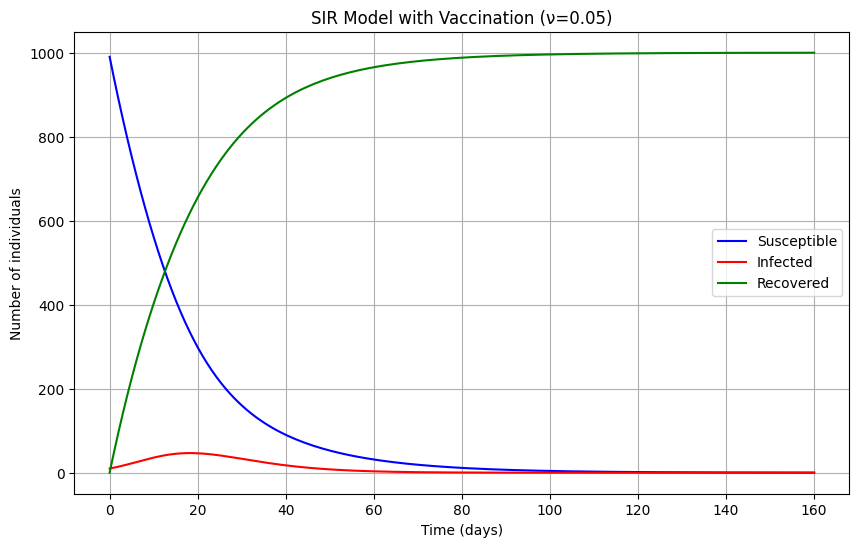

In [7]:
plt.figure(figsize=(10, 6))
plt.plot(t, S, 'b', label='Susceptible')
plt.plot(t, I, 'r', label='Infected')
plt.plot(t, R, 'g', label='Recovered')
plt.title('SIR Model with Vaccination (ν=0.05)')
plt.xlabel('Time (days)')
plt.ylabel('Number of individuals')
plt.legend()
plt.grid()
plt.show()

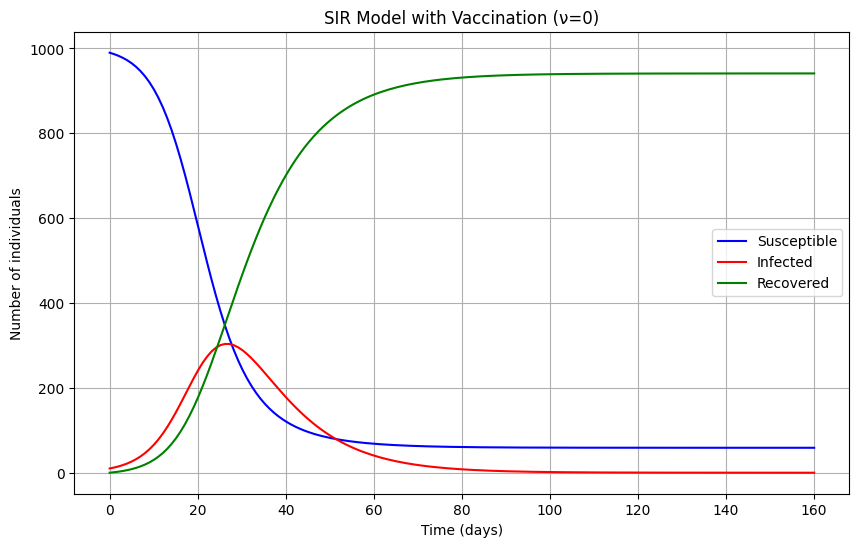

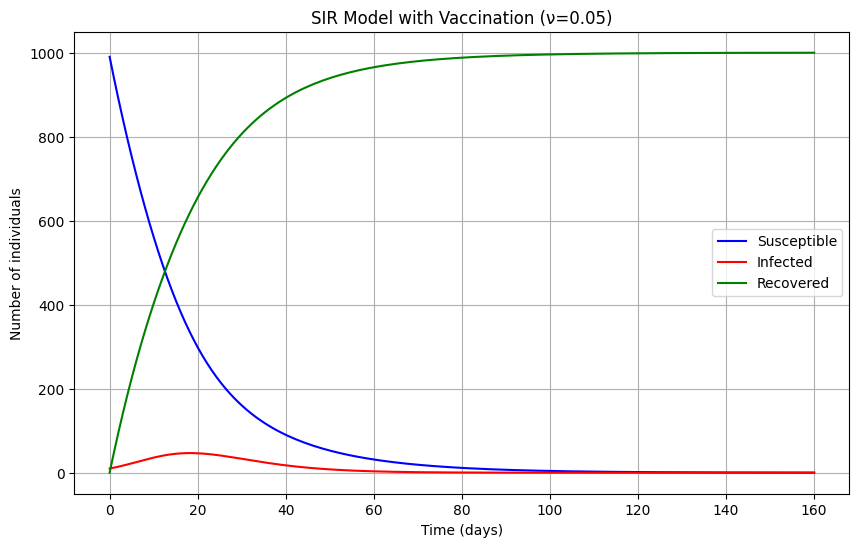

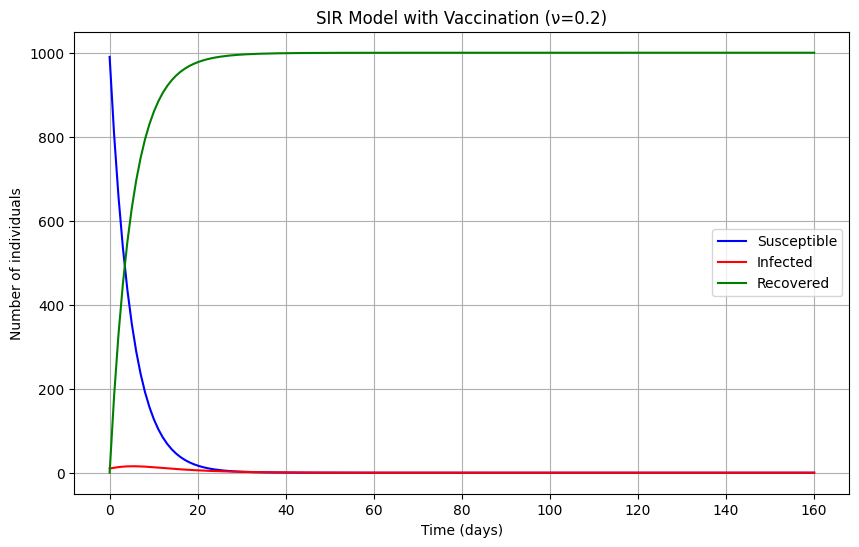

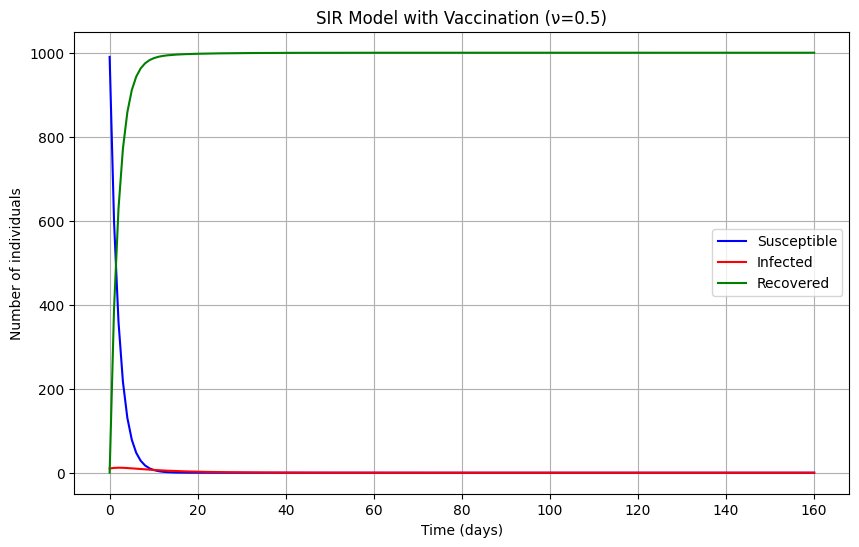

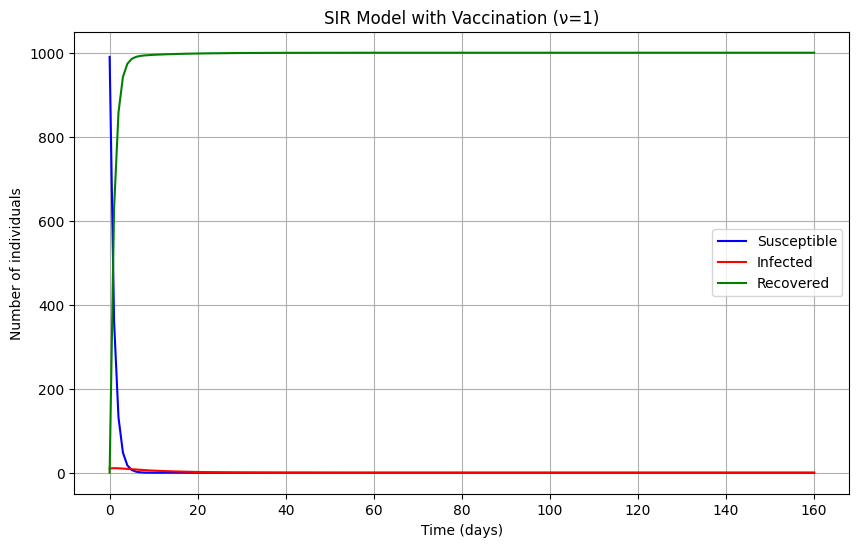

In [10]:
nu2 = [0, 0.05, 0.2, 0.5, 1]

for n in nu2:
  solution = odeint(sir_vaccine_model, initial_conditions, t, args=(beta, gamma, n))
  S, I, R = solution.T
  plt.figure(figsize=(10, 6))
  plt.plot(t, S, 'b', label='Susceptible')
  plt.plot(t, I, 'r', label='Infected')
  plt.plot(t, R, 'g', label='Recovered')
  plt.title(f'SIR Model with Vaccination (ν={n})')
  plt.xlabel('Time (days)')
  plt.ylabel('Number of individuals')
  plt.legend()
  plt.grid()
  plt.show()